In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import imageio
from IPython.display import Image


[[-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]]


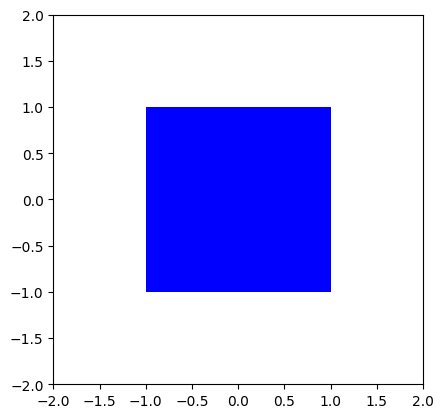

In [2]:
# Definimos un cuadrado de tamaño 2x2 en nuestro plano que va de (-1,-1) a (1,1)
original_vertices = np.array([[-1, -1], [1, -1], [1, 1], [-1, 1], [-1, -1]])

# Creamos una funcion que dibuje en base a los vertices que le proveemos
def display_square(vertices):
    fig, ax = plt.subplots()  # Esto crea una nueva figura y sus ejes
    ax.fill(vertices[:, 0], vertices[:, 1], 'b')  # dibujamos y rellenamos entre los vertices, el parametro "b" es para darle color azul
    ax.set_aspect('equal')

    # fijamos el tamaño del canva
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)

    print(vertices)
    plt.show()



# Mostrar el cuadrado original
display_square(original_vertices)



# Ahora vamos a hacer transformaciones usando matrices, usando de referencia la sisguiente guia

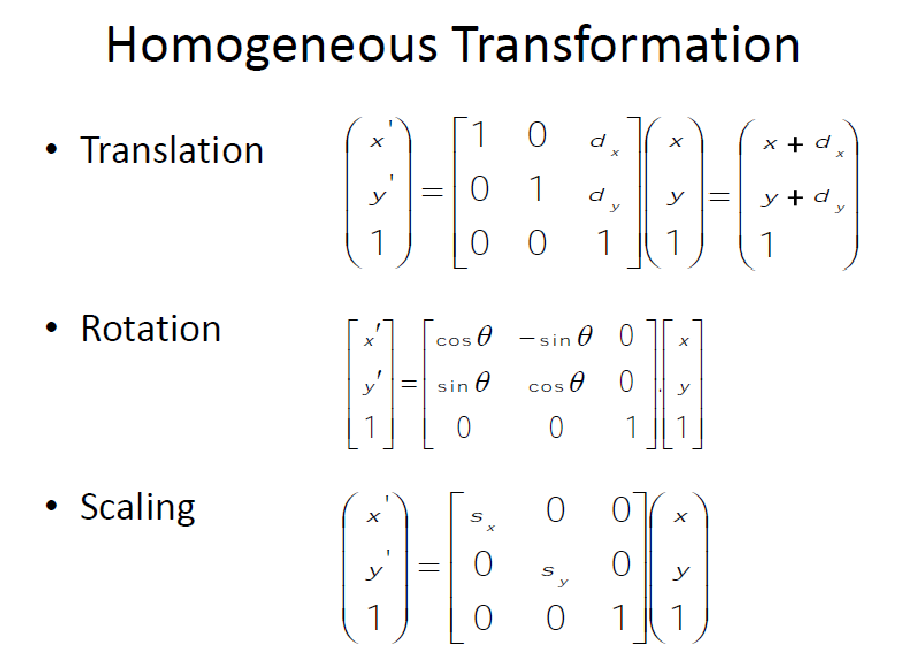

# Escalado

[[-0.5 -0.5]
 [ 0.5 -0.5]
 [ 0.5  0.5]
 [-0.5  0.5]
 [-0.5 -0.5]]


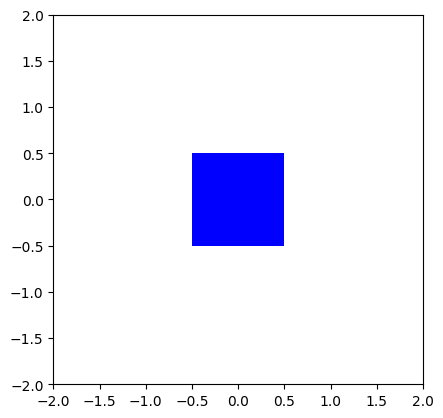

[[-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]]


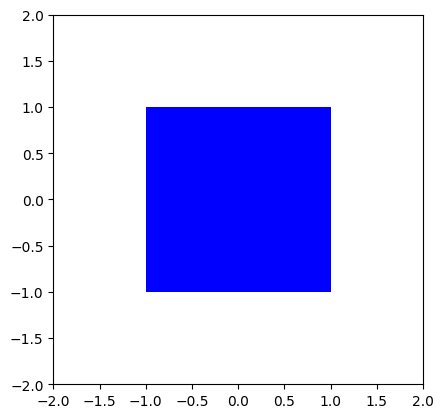

In [3]:
# Matriz de transformación (escalado a la mitad en ambos ejes)
scaling_matrix = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0  , 1]
])

def transform(vertices, transformation_matrix):
    # Convertir los vértices a coordenadas homogéneas (agregando una columna de unos)
    ones = np.ones((vertices.shape[0], 1))
    vertices_homogeneous = np.hstack([vertices, ones])  # (x, y) -> (x, y, 1)

    # Aplicar la transformación completa (matriz 3x3)
    transformed = vertices_homogeneous @ transformation_matrix.T

    # Devolver los vértices transformados (eliminamos la columna homogénea)
    return transformed[:, :2]


scaled_vertices = transform(original_vertices, scaling_matrix)

# Mostrar el cuadrado transformado
display_square(scaled_vertices)
display_square(original_vertices)
# por simplicidad, tambien definimos la funcion transform()



#ahora podemos abstraer esto a una funcion
def scale_square(vertices, scaling_factor_x, scaling_factor_y):
    scaling_matrix = np.array([
        [scaling_factor_x, 0, 0],
        [0, scaling_factor_y, 0],
        [0, 0, 1]
    ])
    return transform(vertices, scaling_matrix)



# Rotación

[[-1.11022302e-16 -1.41421356e+00]
 [ 1.41421356e+00 -1.11022302e-16]
 [ 1.11022302e-16  1.41421356e+00]
 [-1.41421356e+00  1.11022302e-16]
 [-1.11022302e-16 -1.41421356e+00]]


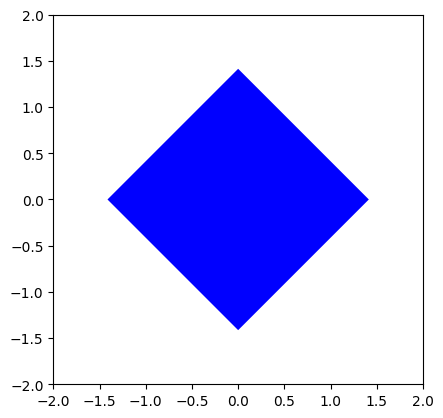

[[-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]]


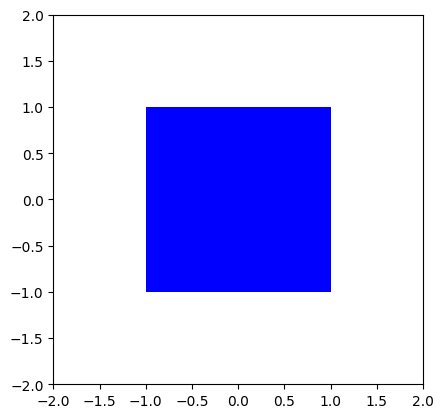

In [4]:
# Elegir un ángulo en grados y convertir a radianes
angle_degrees = 45
theta = np.radians(angle_degrees)

# Crear matriz de rotación usando cosenos y senos
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0,              0,             1]
])

rotated_vertices = transform(original_vertices, rotation_matrix)

# Mostrar el cuadrado transformado
display_square(rotated_vertices)
display_square(original_vertices)

# Abstraemos esto a una función
def rotate_square(vertices, angle_degrees):
    theta = np.radians(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,              0,             1]
    ])
    return transform(vertices, rotation_matrix)

# Translación

[[-0.5 -1.5]
 [ 1.5 -1.5]
 [ 1.5  0.5]
 [-0.5  0.5]
 [-0.5 -1.5]]


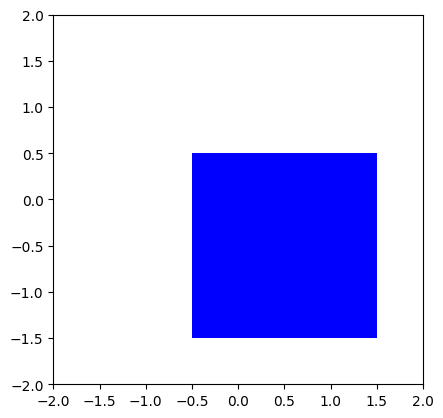

[[-1 -1]
 [ 1 -1]
 [ 1  1]
 [-1  1]
 [-1 -1]]


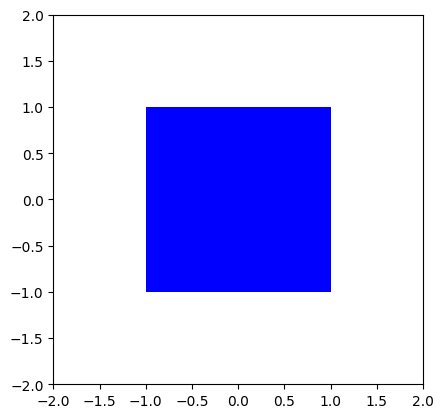

In [5]:
# elegimos cuanto vamos a trasladar la figura
delta_x = 0.5
delta_y = -0.5

translation_matrix = np.array([
    [1, 0, delta_x],
    [0, 1, delta_y],
    [0, 0, 1]
])

translated_vertices = transform(original_vertices, translation_matrix)

# Mostrar el cuadrado transformado
display_square(translated_vertices)
display_square(original_vertices)



# definimos una funcion de translacion
def translate_square(vertices, delta_x, delta_y):
  translation_matrix = np.array([
    [1, 0, delta_x],
    [0, 1, delta_y],
    [0, 0, 1]])
  return transform(vertices, translation_matrix)

# Animación

In [6]:
dx, dy = 0.03, 0.03  # Velocidad de traslación
sx, sy = 0.9, 0.9  # Velocidad de escalado
angle = 3  # Velocidad de rotación
frames = 50  # Número de frames de la animación

# Lista para guardar los fotogramas
frames_gif = []
matplotlib.use('Agg')  # Usar backend compatible con exportación a imagen

def save_frame(vertices):
    fig, ax = plt.subplots()
    ax.fill(vertices[:, 0], vertices[:, 1], 'b')
    ax.set_aspect('equal')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.axis('off')

    fig.canvas.draw()  # Renderizamos la figura
    img = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)  # Usamos buffer_rgba en lugar de tostring_rgb
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (4,))  # 4 canales (RGBA)

    plt.close(fig)
    return img

In [7]:
final_vertices = original_vertices.copy()

# Generamos la animación
for i in range(frames):
    # Aplicamos traslación
    final_vertices = translate_square(final_vertices, dx*i, dy*i)
    # Aplicamos rotación
    final_vertices = rotate_square(final_vertices, i*angle)  # Rotación de 3 grados por fotograma
    final_vertices = scale_square(final_vertices, sx, sy)


    img = save_frame(final_vertices)
    frames_gif.append(img)

# Guardamos el GIF con imageio
imageio.mimsave('animacion_cuadrado.gif', frames_gif, duration=0.05)  # 0.05 segundos por fotograma


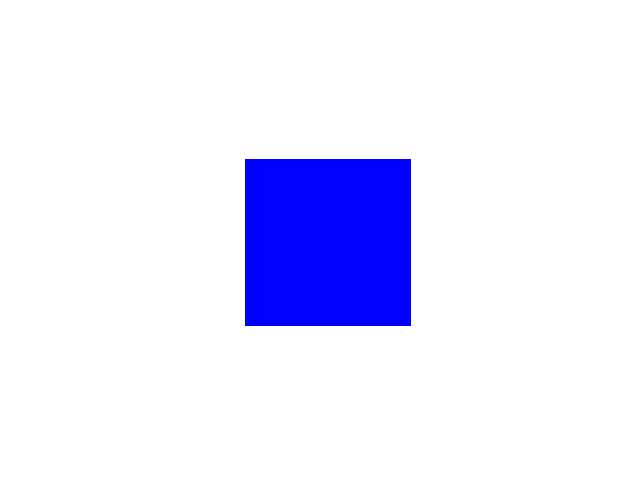

In [8]:

# Mostrar la animación en Colab
Image(filename='animacion_cuadrado.gif')  # Esto se visualizará dentro de Colab